In [112]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from string import punctuation
from nltk.tokenize import word_tokenize
from random import randint

In [113]:
nltk.download("stopwords")
nltk.download("punkt")
stopwords_en = stopwords.words("english")
len(stopwords_en)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/maximer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/maximer/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


179

In [114]:
print(stopwords_en)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [115]:
df = pd.read_csv('src/emotions.csv')
df.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


<Axes: >

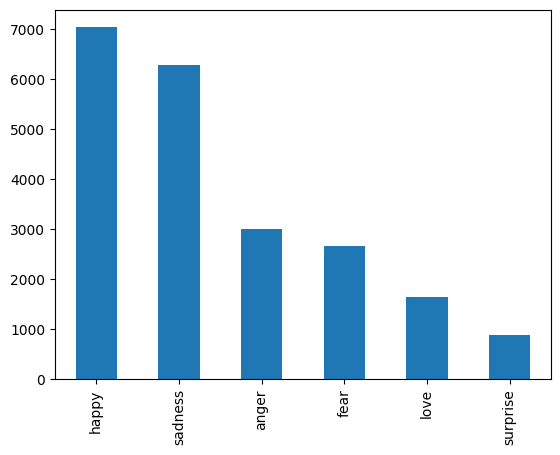

In [116]:
df.Emotion.value_counts().plot.bar()

In [117]:
rand = randint(0,1000)
example_sentence = df.loc[rand,"Text"]
example_emotion = df.loc[rand, "Emotion"]
example_sentence, example_emotion

('i also know how good it feels to look back and see that i honored my word and that helps from the start',
 'happy')

In [118]:
def clean_tokenize(sentence):
    tokens = word_tokenize(sentence)
    final = []
    for t in tokens:
        t=t.lower()
        if t not in stopwords_en and t not in punctuation:
            final.append(t) 
    return final


In [119]:
df["Tokens"] = df["Text"].apply(clean_tokenize)

In [120]:
df.sample(5)

,Text,Emotion,Tokens
413,i really want to go buy some yardage of art ga...,surprise,"[really, want, go, buy, yardage, art, gallery,..."
11804,i feel distracted and its sometimes hard to ta...,anger,"[feel, distracted, sometimes, hard, talk, god,..."
5826,im feeling totally lame for not posting anythi...,sadness,"[im, feeling, totally, lame, posting, anything..."
17964,i was feeling disheartened when going on dates...,sadness,"[feeling, disheartened, going, dates, feel, me..."
8735,im ready to start my shots again that two and ...,sadness,"[im, ready, start, shots, two, half, weeks, fl..."


In [121]:
df_gb = df.groupby(by="Emotion")

In [122]:
from collections import Counter

most_commons = {}

for emotion, group in df_gb:
    # Liste les listes de tokens selon "Emotion"
    tokens_list = group['Tokens'].tolist()

    # Crée une seule grande liste contenant tous les mots pour chaque emotion
    all_tokens = [token for sublist in tokens_list for token in sublist]

    #Compte les mots et repertorie les 30 + utilisés
    word_counts = Counter(all_tokens)
    most_common_words = word_counts.most_common(30)

    # Range dans un dictionnaire qui prend l'emotion en clé et qui stocke une liste de 30 tuples
    # pour les 30 mots les + utilisés et leur fréquence
    most_commons[emotion] = most_common_words

most_commons

{'anger': [('feel', 1803),
  ('feeling', 923),
  ('like', 479),
  ('im', 426),
  ('really', 171),
  ('get', 154),
  ('people', 150),
  ('know', 149),
  ('time', 146),
  ('little', 136),
  ('want', 129),
  ('even', 125),
  ('would', 118),
  ('angry', 116),
  ('think', 111),
  ('one', 108),
  ('could', 108),
  ('things', 105),
  ('bit', 103),
  ('way', 102),
  ('offended', 92),
  ('dont', 91),
  ('resentful', 87),
  ('cold', 86),
  ('still', 85),
  ('something', 85),
  ('irritable', 84),
  ('cant', 83),
  ('going', 81),
  ('bothered', 81)],
 'fear': [('feel', 1483),
  ('feeling', 926),
  ('im', 383),
  ('like', 322),
  ('little', 194),
  ('bit', 143),
  ('know', 139),
  ('really', 129),
  ('anxious', 126),
  ('time', 119),
  ('still', 119),
  ('people', 106),
  ('one', 104),
  ('nervous', 103),
  ('get', 98),
  ('want', 95),
  ('would', 94),
  ('strange', 92),
  ('terrified', 89),
  ('think', 89),
  ('going', 89),
  ('ive', 85),
  ('afraid', 85),
  ('agitated', 84),
  ('scared', 83),
  (